# **Analyzing Customer Churn in a Telecom Company**

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from xgboost import XGBClassifier


In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape


(7043, 21)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.dtypes


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


# Data preprocessing

handling duplicates


In [ ]:
import pandas as pd

duplicates = df.duplicated()

num_duplicates = duplicates.sum()

print(f"Number of duplicate samples: {num_duplicates}")


duplicate_rows = df[df.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)


Number of duplicate samples: 0
Duplicate rows:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


we don't need the customerID column as it's doesn't add a meaning to the churn

In [ ]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


we will covert TotalCharges to numerical because it actually holds numerical values

In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Now we will remove data samples with tenure = 0 , because they have never been customers in the first place so there is no point in checking whether they will churn

In [ ]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

we map the value of 0 and 1 to no and yes in the SeniorCitizen column to encode the column later

In [ ]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# statistics of nuemarical

In [ ]:

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# Correlation analysis

In [ ]:
df2 = df
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_dummies = pd.get_dummies(df2)
df_dummies.head()

<ipython-input-70-78d92f0da731>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-70-78d92f0da731>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,34,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,2,53.85,108.15,1,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,45,42.30,1840.75,0,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,2,70.70,151.65,1,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


duplicates detection

<Axes: >

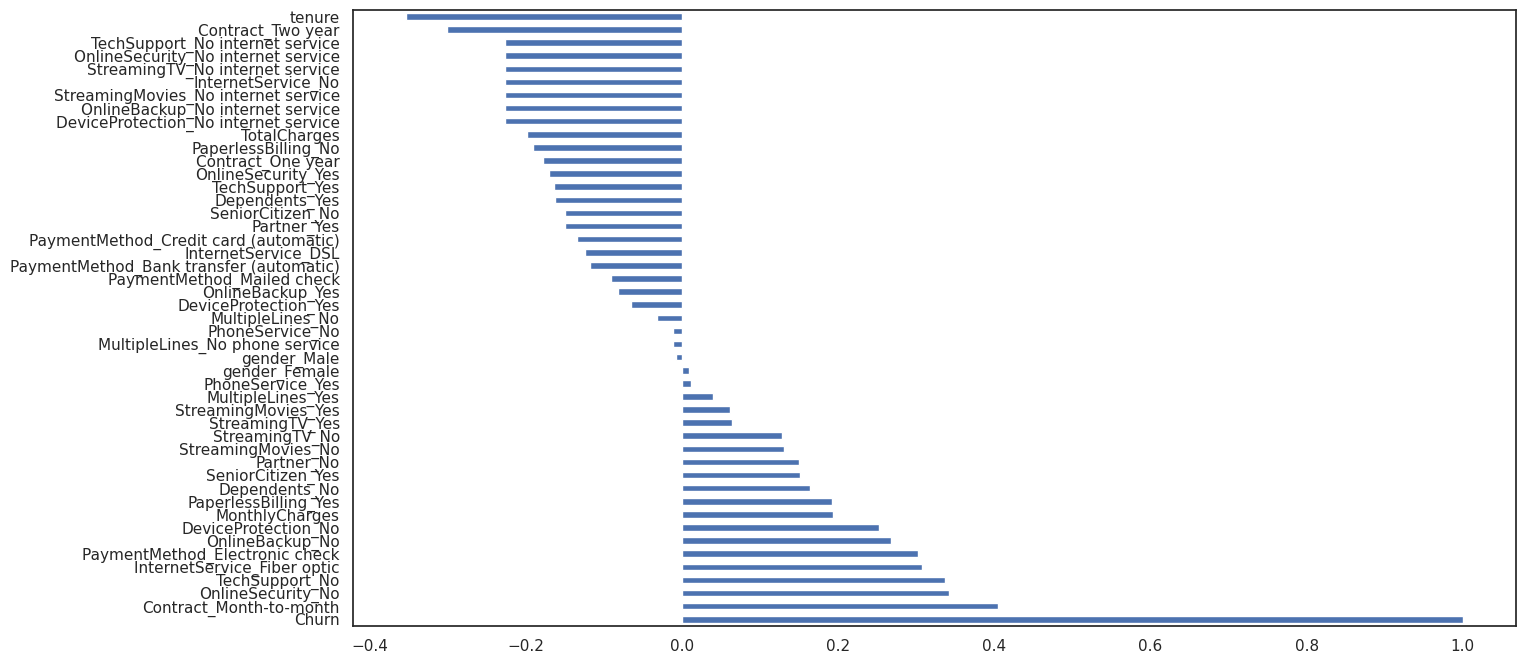

In [ ]:
plt.figure(figsize=(15,8))
sns.set(style='white')

df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='barh')


# Data visualization

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


gender_labels = ['Male', 'Female']
churn_labels = ['No', 'Yes']


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=gender_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=churn_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)


fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=14)


fig.update_layout(
    title_text="Gender and Churn Distributions",
    width=800,
    height=400,
    annotations=[dict(text='Gender', x=0.18, y=0.5, font_size=16, showarrow=False),
                 dict(text='Churn', x=0.82, y=0.5, font_size=16, showarrow=False)],

    paper_bgcolor='lightgrey',
    plot_bgcolor='white',
)


fig.data[0].marker.colors = ('#1f77b4', '#ff008c')
fig.data[1].marker.colors = ('#2ca02c', '#d62728')

fig.show()


1. 26.6% of the customers churned
2. gender demography among customers is 49.5% females and 50.5% males

In [ ]:
import plotly.express as px


color_discrete_map = {"Month-to-month": "#7fcdff", "One year": "#326ada", "Two year": "#ff9b35"}


fig = px.histogram(
    df,
    x="Churn",
    color="Contract",
    barmode="group",
    title="<b>Churn Distribution with respect to Contract</b>",
    color_discrete_map=color_discrete_map
)

fig.update_layout(
    width=800,
    height=500,
    bargap=0.15,
    title_font_size=18,
    xaxis_title="<b>Churn</b>",
    yaxis_title="<b>Count</b>",
    xaxis=dict(
        showgrid=True,
        gridcolor='lightgrey',
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgrey',
    ),
    plot_bgcolor='white',
    paper_bgcolor='lightgrey',
)

fig.show()


customers with short term contacts tend to churn more than churn with long term contract

Most customers who left the service were using Electronic Check as their payment method. On the other hand, those who used Credit Card automatic transfers, Bank automatic transfers, or Mailed Checks were less likely to cancel their service.

In [ ]:
df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()


,,count
InternetService,Churn,
DSL,0,992
Fiber optic,0,910
No,0,717
Fiber optic,1,633
DSL,1,240
No,1,57


In [ ]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()


,,count
InternetService,Churn,
DSL,0,965
Fiber optic,0,889
No,0,690
Fiber optic,1,664
DSL,1,219
No,1,56


In [ ]:
fig = go.Figure()

colors = {'Female':'steelblue','Male':'firebrick'}

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL'))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))


fig.update_layout(title_text="<b>Churn Distribution with respect to Internet Service and Gender</b>")
fig.data[0].marker.color = ('#7fcdff','#7fcdff','#7fcdff','#7fcdff')
fig.data[1].marker.color = ('#3e6eda','#3e6eda','#3e6eda','#3e6eda')
fig.data[2].marker.color = ('#f39135','#f39135','#f39135','#f39135')


fig.show()

Many customers have chosen fiber optic service, but there's a noticeable trend of them leaving, indicating a high churn rate. This suggests that there may be underlying issues with the fiber optic service that are leaving many customers dissatisfied. Investigating these concerns could help us find a more effective solution. On the other hand, more people have opted for DSL service, and it has a lower churn rate compared to fiber optic service.



In [ ]:
color_map = {"Yes": "#20b2aa", "No": "#ffa07a"}

fig = px.histogram(
    df,
    x="Churn",
    color="Dependents",
    barmode="group",
    title="<b>Churn distribution with respect to Dependents</b>",
    color_discrete_map=color_map
)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


customers with no dependent churn

In [ ]:
color_map = {"Yes": "#4682b4", "No": "#ff6347"}

fig = px.histogram(
    df,
    x="Churn",
    color="Partner",
    barmode="group",
    title="<b>Churn distribution with respect to Partners</b>",
    color_discrete_map=color_map
)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


customers without dependents and customers who don't have partners are more likely to churn




In [ ]:
color_map = {"Yes": '#4682b4', "No": '#ff6347'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Churn distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

most of the senior citizens churn.


In [ ]:
color_map = {"Yes": "#4682b4", "No": "#ff6347", "No internet service":"#7fcdff"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn with respect to Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

No online security makes most people churn


In [ ]:
color_map = {"Yes": "#4682b4", "No": "#ff6347", "No internet service":"#7fcdff"}


fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Churn distribution w.r.t. TechSupport</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

 no TechSupport were the similiar trend are of the customers who are most likely churn.

In [ ]:
color_map = {"Yes": '#4682b4', "No": '#ff6347'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Churn distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

customers who don't have phone service are more likely to churn

# Which services or lack of services causes the most Churning?


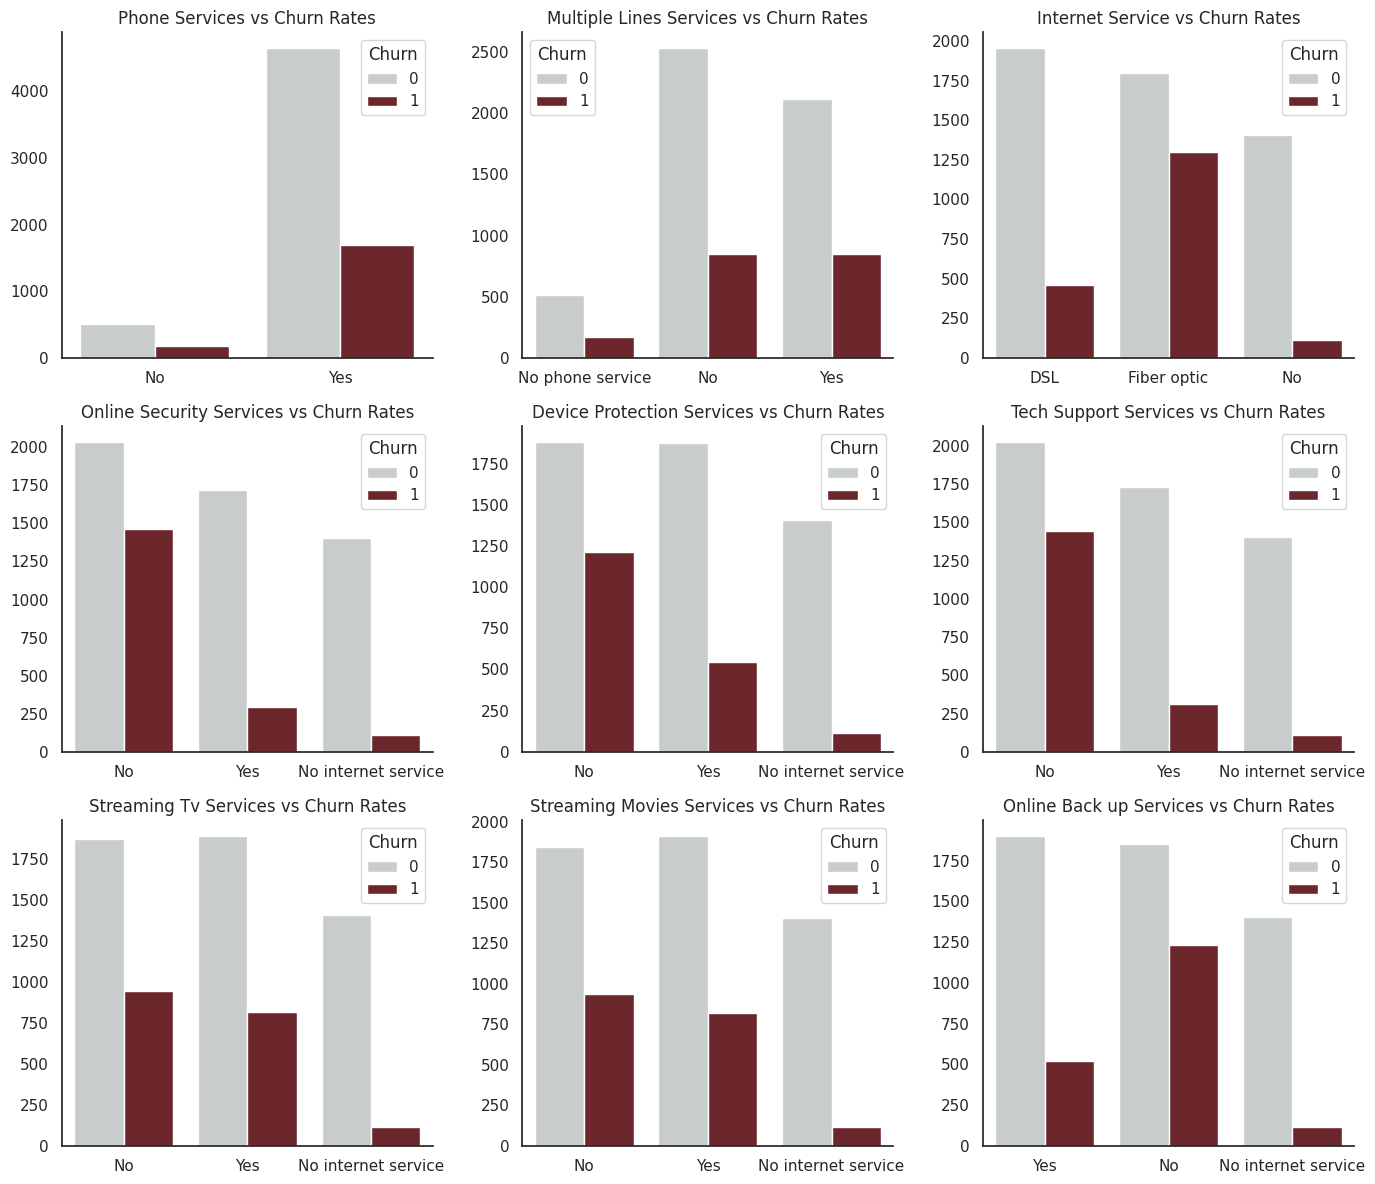

In [ ]:
import seaborn as sn
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))
colors = ["#C7CDCB", "#781B24"]
sn.set_palette(sn.color_palette(colors))
sn.countplot(x="PhoneService", hue="Churn", data=df, ax=axes[0,0]).set(title='Phone Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="MultipleLines", hue="Churn", data=df, ax=axes[0,1]).set(title='Multiple Lines Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="InternetService", hue="Churn", data=df, ax=axes[0,2]).set(title='Internet Service vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="OnlineSecurity", hue="Churn", data=df, ax=axes[1,0]).set(title='Online Security Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="DeviceProtection", hue="Churn", data=df, ax=axes[1,1]).set(title='Device Protection Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="TechSupport", hue="Churn", data=df, ax=axes[1,2]).set(title='Tech Support Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="StreamingTV", hue="Churn", data=df, ax=axes[2,0]).set(title='Streaming Tv Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="StreamingMovies", hue="Churn", data=df, ax=axes[2,1]).set(title='Streaming Movies Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="OnlineBackup", hue="Churn",data=df, ax=axes[2,2]).set(title='Online Back up Services vs Churn Rates', xlabel=None, ylabel = None)
sn.despine()
plt.tight_layout()
plt.show()

customers who don't have phone service are more likely to churn

# The Analytics of Segmentation, and Cluster Analysis


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
from sklearn.cluster import KMeans

In [ ]:
df_cluster = df.copy()
df_cluster = df_cluster.drop(['TotalCharges'], axis=1)

scaler = StandardScaler()
df_cluster[['tenure', 'MonthlyCharges']] = scaler.fit_transform(df_cluster[['tenure', 'MonthlyCharges']])

df_cluster[df_cluster.columns[~df_cluster.columns.isin(['tenure','MonthlyCharges'])]] = encoder.fit_transform(df_cluster[df_cluster.columns[~df_cluster.columns.isin(['tenure','MonthlyCharges'])]])

In [ ]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10, 7))
    plt.plot(means, inertias, 'o-', color = 'black')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

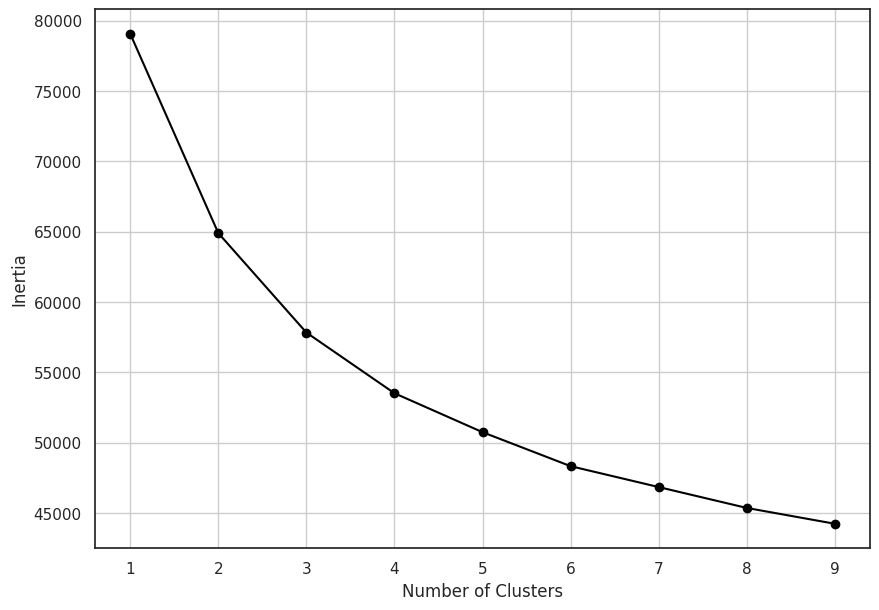

In [ ]:
optimise_k_means(df_cluster, 10)


In [ ]:
kmeans = KMeans(n_clusters = 4,  random_state=10)
kmeans.fit(df_cluster)
df_cluster['Cluster'] = kmeans.labels_/

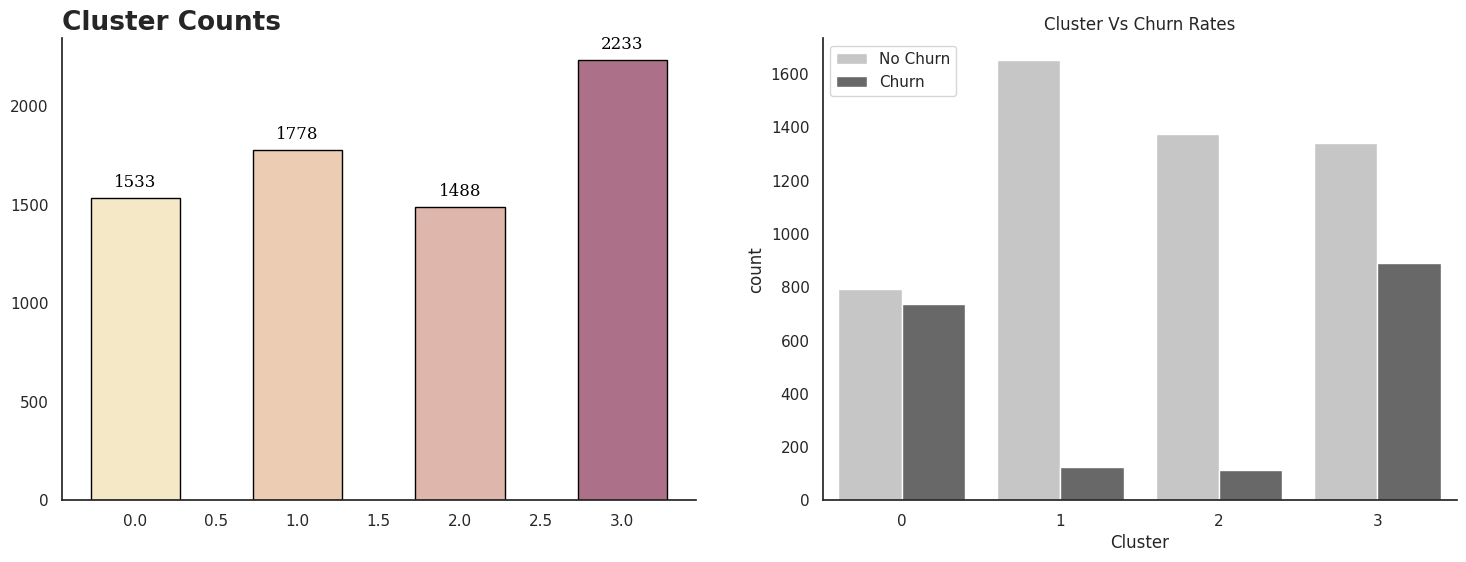

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(18, 6))
data_temp = df_cluster['Cluster'].value_counts().sort_index()
ax[0].bar(data_temp.index, data_temp,
          edgecolor='black', color=['#F5E8C7', '#ECCCB2', '#DEB6AB', '#AC7088']
       ,width=0.55 )
ax[0].set_title('Cluster Counts', loc='left', fontsize=19, fontweight='bold')
for i in data_temp.index:
    ax[0].annotate(f"{data_temp[i]}",
                   xy=(i, data_temp[i] + 80),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='black')
for s in ['top', 'right']:
    ax[0].spines[s].set_visible(False)


sn.countplot(x='Cluster', hue="Churn", palette="Greys", data=df_cluster)
sn.despine()
plt.legend(title='', loc='upper left', labels=['No Churn', 'Churn'])
plt.title("Cluster Vs Churn Rates")
plt.show()

Clusters 0 and 3 have a higher Churn Rate compared to Cluster 1 and 2

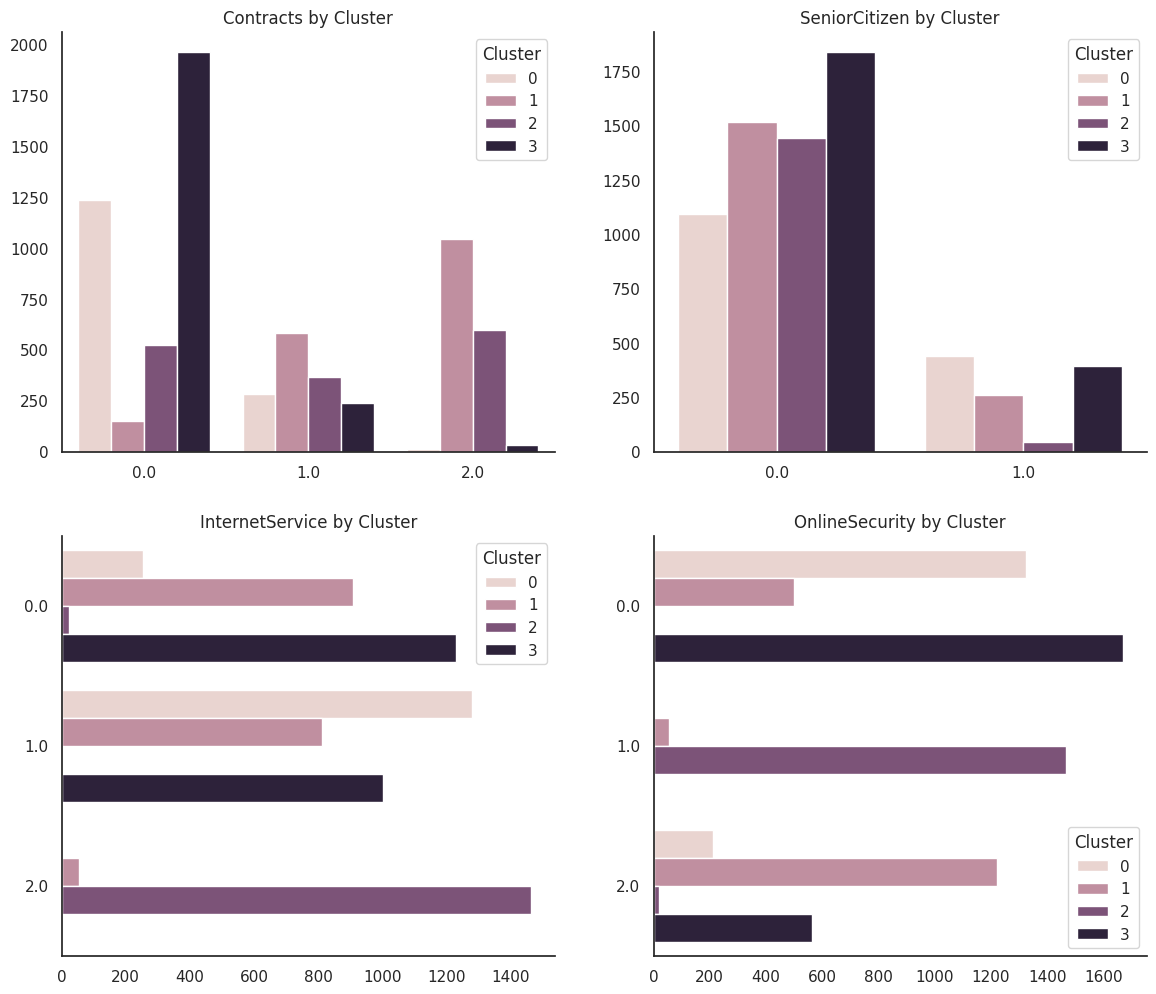

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
sn.despine()

colors = ["#553939", "#808080", "#A27B5C","#A9A9A9"]
sn.set_palette(sn.color_palette(colors))
ax = sn.countplot(x="Contract", hue="Cluster", data=df_cluster, ax = axes[0,0]).set(title='Contracts by Cluster', xlabel=None, ylabel = None)
ax = sn.countplot(x="SeniorCitizen", hue="Cluster", data=df_cluster, ax = axes[0,1]).set(title='SeniorCitizen by Cluster', xlabel=None, ylabel = None)
ax = sn.countplot(y='InternetService', hue="Cluster", data=df_cluster,ax = axes[1,0]).set(title='InternetService by Cluster', xlabel=None, ylabel = None)
ax = sn.countplot(y='OnlineSecurity', hue="Cluster", data=df_cluster, ax = axes[1,1]).set(title='OnlineSecurity by Cluster', xlabel=None, ylabel = None)
sn.despine()

Clusters 0 and 3 are typically -

in the Month - to Month Contract
More likely to be elderly
Does not have Online Security
Uses Fiber optic


# conclusion

1. Contract Type and Churn: Around 75% of customers with a Month-to-Month contract chose to leave, compared to just 13% with a One-Year contract and a mere 3% with a Two-Year contract. This highlights the stability offered by longer-term agreements.

2. Payment Methods and Churn: The majority of customers who churned were using Electronic Check as their payment method. By contrast, those who used Credit Card automatic payments, Bank automatic transfers, or Mailed Checks were less likely to switch providers.

3. Fiber Optic Service Concerns: Fiber optic services, though popular, had the highest churn rates. This suggests potential dissatisfaction with the service. Investigating and addressing the root causes could help improve customer retention.

4. DSL Service Performance: Customers using DSL services were more numerous and had lower churn rates compared to those using Fiber Optic services, indicating better satisfaction with DSL offerings.

5. Demographics and Churn: Customers without dependents and those with partners were more likely to churn. Additionally, senior citizens represented a significant proportion of those leaving.

6. Service Gaps and Churn: A common trend among customers who churned was the absence of essential services like online security, a paperless billing system, and tech support. These gaps appear to play a major role in their decision to leave.

7. Phone Service and Churn: A small subset of customers without phone service also showed a higher likelihood of churn, highlighting an area worth exploring further.



<ipython-input-91-7f88268703d3>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




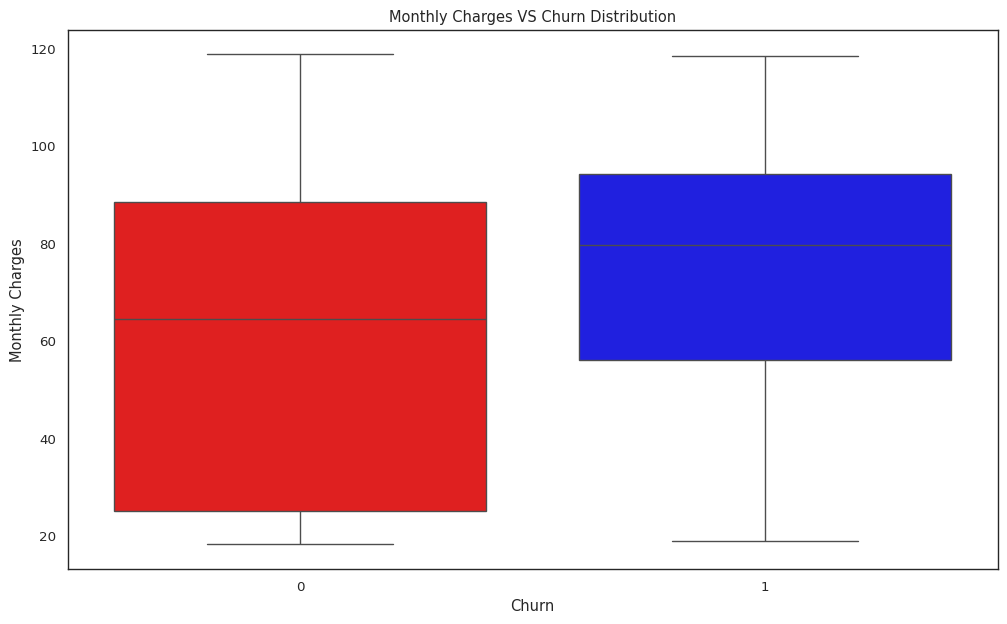

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_context("paper", font_scale=1.1)

sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette={"0": "Red", "1": "Blue"})
plt.title('Monthly Charges VS Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()



High Monthly Charges are also one of a reason which makes Customers more likely to churn

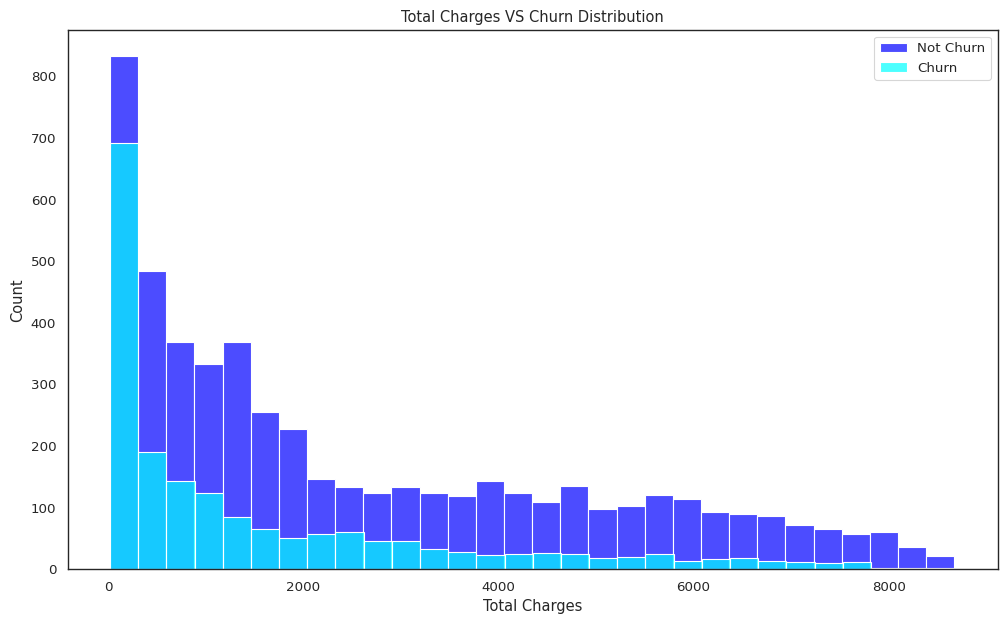

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_context("paper", font_scale=1.1)

sns.histplot(df[df["Churn"] == 0].TotalCharges, color="blue", label="Not Churn", kde=False, bins=30, alpha=0.7)
sns.histplot(df[df["Churn"] == 1].TotalCharges, color="cyan", label="Churn", kde=False, bins=30, alpha=0.7)
plt.legend(loc='upper right')
plt.title('Total Charges VS Churn Distribution')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.show()


In [ ]:
df.drop(columns=['gender'], inplace=True)
df.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


High Total Charges are also one of a reason which makes Customers more likely to churn,there might be an issue with pricing system which needs to addressed

#Building a churn prediciton model

In [ ]:
def encode(column):
    if column.dtype=='object':
        column = LabelEncoder().fit_transform(column)
    return column

In [ ]:
df2 = df
df = df.apply(lambda x: encode(x))
X = df.drop(columns = ['Churn'])
y = df['Churn'].values
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)


In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']


In [ ]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)

In [ ]:
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService']
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe))

In [ ]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# *Multiple* Machine Learning Model Evaluations and Testing

# SUPPORT VECTOR CLASSIFIER

SVM accuracy is : 0.820184790334044
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1042
           1       0.73      0.48      0.58       365

    accuracy                           0.82      1407
   macro avg       0.79      0.71      0.73      1407
weighted avg       0.81      0.82      0.81      1407

------------------------------------------------------------


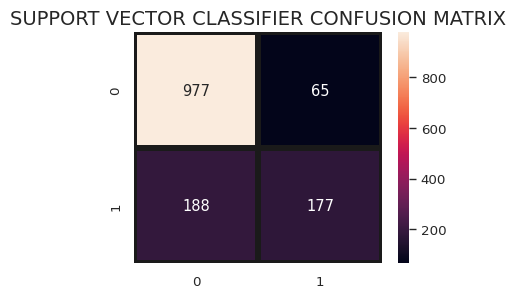

In [ ]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)
print('-'*60)
print(classification_report(y_test, predict_y))
print('-'*60)
plt.figure(figsize=(4,3))

sns.heatmap(confusion_matrix(y_test, predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("SUPPORT VECTOR CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# RANDOM FOREST CLASSIFIER

0.828002842928216
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1042
           1       0.74      0.52      0.61       365

    accuracy                           0.83      1407
   macro avg       0.79      0.73      0.75      1407
weighted avg       0.82      0.83      0.82      1407

------------------------------------------------------------


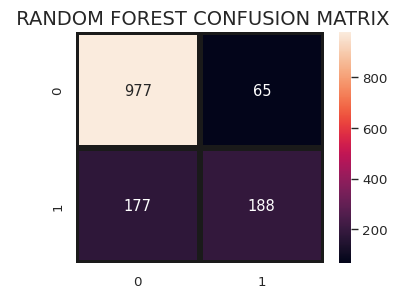

------------------------------------------------------------


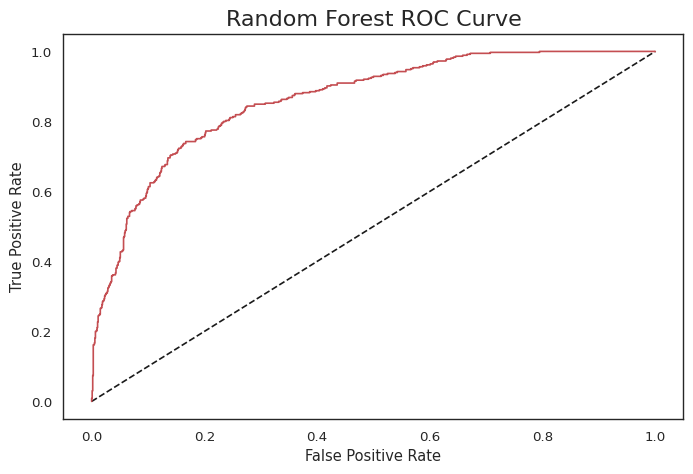

In [ ]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =65,
                                  max_leaf_nodes = 35)
model_rf.fit(X_train, y_train)

prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))
print('-'*60)


print(classification_report(y_test, prediction_test))
print('-'*60)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),annot=True,fmt = "d",linecolor="k",linewidths=3)


plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()
print('-'*60)

y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

# LOGESTIC REGRESSION

Logistic Regression accuracy is : 0.820184790334044
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1042
           1       0.69      0.56      0.62       365

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407

------------------------------------------------------------


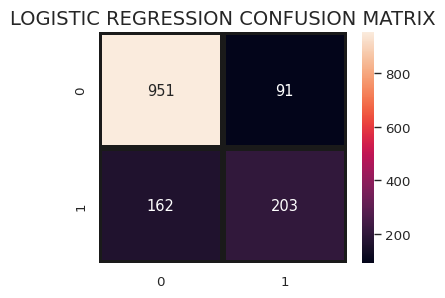

------------------------------------------------------------


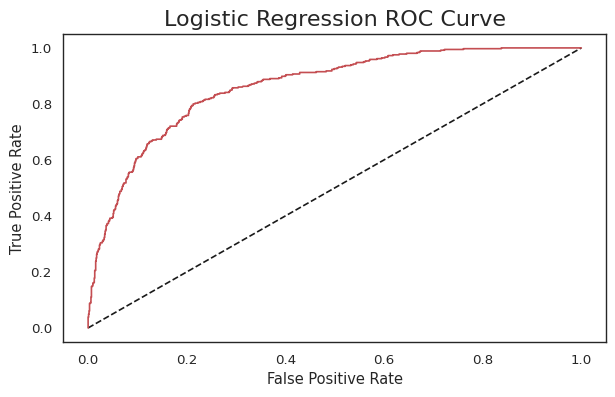

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
print('-'*60)

lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

print('-'*60)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

print('-'*60)

y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

# DECISION TREE CLASSIFIER

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

print(classification_report(y_test, predictdt_y))

Decision Tree accuracy is : 0.7320540156361052
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1042
           1       0.48      0.53      0.50       365

    accuracy                           0.73      1407
   macro avg       0.66      0.67      0.66      1407
weighted avg       0.74      0.73      0.74      1407



# ADABOOST CLASSIFIER

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost Classifier accuracy
0.8187633262260128
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1042
           1       0.69      0.54      0.61       365

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407



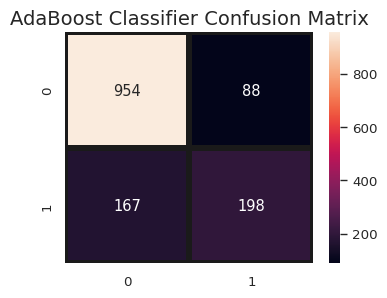

In [ ]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
print(metrics.accuracy_score(y_test, a_preds))


print(classification_report(y_test, a_preds))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

# GRADIENT BOOST CLASSIFIER

Gradient Boosting Classifier 0.8216062544420754
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1042
           1       0.71      0.53      0.61       365

    accuracy                           0.82      1407
   macro avg       0.78      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407



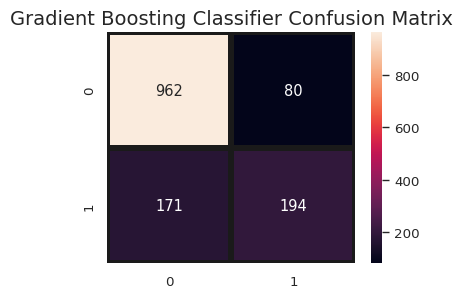

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

print(classification_report(y_test, gb_pred))


plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

# Conclusion:

Based on the comparison of models, it’s clear that the Random Forest model outperforms the others. Customer churn has a significant financial impact on a company, reducing funds and affecting overall profitability.

# Interactive dashboard using plotlydash

In [ ]:
!pip install jupyter-dash dash pandas plotly

In [ ]:
import pandas as pd
import dash
from dash import html, dcc, Input, Output
import plotly.express as px


df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')


df['Churn'] = df['Churn'].astype('category')


df = df.dropna(subset=['Churn'])


categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'Churn']


app = dash.Dash(__name__)


app.layout = html.Div([
    html.H1('Telco Churn Dashboard'),

    html.Div([
        html.Label('Select a Feature:'),
        dcc.Dropdown(
            id='feature-dropdown',
            options=[{'label': col, 'value': col} for col in categorical_cols],
            value='Gender'
        )
    ]),

    dcc.Graph(id='churn-graph')
])

@app.callback(
    Output('churn-graph', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_graph(selected_feature):
    try:
        filtered_df = df.groupby([selected_feature, 'Churn']).size().reset_index(name='Count')
        fig = px.bar(filtered_df, x=selected_feature, y='Count', color='Churn', barmode='group',
                     title=f'Churn by {selected_feature}')
        return fig
    except Exception as e:
        print(f"An error occurred: {e}")
        return px.bar()


if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>